In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
diabetes = pd.read_csv(r"C:\Users\KAsab\Desktop\YOUTUBE R VIDEOS DATASETS\diabetes.csv")

In [70]:
heart = pd.read_csv(r"C:\Users\KAsab\Desktop\YOUTUBE R VIDEOS DATASETS\heart.csv")

In [71]:
default = pd.read_csv(r"C:\Users\KAsab\Desktop\ALL CSV FILES - 2nd Edition\Default.csv")

In [72]:
iris = pd.read_csv(r"C:\Users\KAsab\Downloads\Iris.csv")

In [73]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [74]:
age = heart["age"]
insulin = diabetes["Insulin"]

In [75]:
age.head()

0    52
1    53
2    70
3    61
4    62
Name: age, dtype: int64

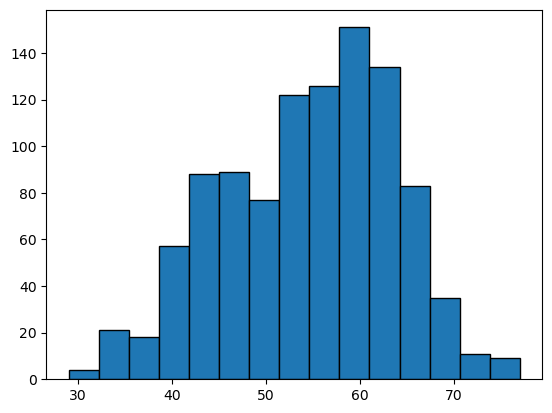

In [76]:
plt.hist(age,edgecolor = "black",bins = 15);

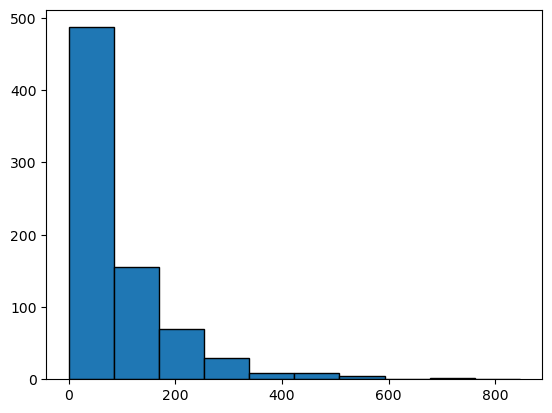

In [77]:
plt.hist(insulin,edgecolor = "black");

In [78]:
from sklearn.preprocessing import RobustScaler,Normalizer

In [79]:
rs = RobustScaler()

In [80]:
insulin = pd.DataFrame(insulin)
age = pd.DataFrame(age)

In [81]:
insulin_scaled = rs.fit_transform(insulin)

In [82]:
insulin_scaled[1:10]

array([[-0.23968566],
       [-0.23968566],
       [ 0.49901768],
       [ 1.0805501 ],
       [-0.23968566],
       [ 0.4518664 ],
       [-0.23968566],
       [ 4.02750491],
       [-0.23968566]])

In [83]:
from sklearn.preprocessing import PolynomialFeatures

In [84]:
polynomial_interaction = PolynomialFeatures(degree = 2,include_bias = False)

In [85]:
polynomial_interaction.fit_transform(age)

array([[  52., 2704.],
       [  53., 2809.],
       [  70., 4900.],
       ...,
       [  47., 2209.],
       [  50., 2500.],
       [  54., 2916.]])

In [86]:
df = diabetes[["Age","Insulin"]]

In [87]:
df.head()

,Age,Insulin
0,50,0
1,31,0
2,32,0
3,21,94
4,33,168


In [88]:
interaction = PolynomialFeatures(degree=2,interaction_only = True,include_bias = False)
## interaction only = True restrics features created to only interaction features

In [89]:
interaction.fit_transform(df)

array([[  50.,    0.,    0.],
       [  31.,    0.,    0.],
       [  32.,    0.,    0.],
       ...,
       [  30.,  112., 3360.],
       [  47.,    0.,    0.],
       [  23.,    0.,    0.]])

To make a custom transformation to one or more features

In [90]:
from sklearn.preprocessing import FunctionTransformer

In [91]:
# Define a simple function
def add_ten(x: int)->int:
    return x + 10

In [92]:
ten_transformer = FunctionTransformer(add_ten)

In [93]:
ten_transformer.transform(age)

,age
0,62
1,63
2,80
3,71
4,72
...,...
1020,69
1021,70
1022,57
1023,60


### Detecting Outliers

In [94]:
from sklearn.covariance import EllipticEnvelope

In [95]:
outlier_detector = EllipticEnvelope(contamination = .1)

In [96]:
outlier_detector.fit(insulin)

EllipticEnvelope()

In [97]:
outlier_detector.predict(insulin)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [98]:
# cretae a function to return the index of outliers
def indices_of_outliers(x: int) -> np.array(int):
    q1,q3 = np.percentile(x,[25,75])
    iqr = q3 - q1
    lower_bound = q1-(iqr *1.5)
    upper_bound = q3 + (iqr*1.5)
    return np.where((x> upper_bound) | (x< lower_bound))

In [99]:
indices_of_outliers(insulin)

(array([  8,  13,  54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258,
        286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584,
        612, 645, 655, 695, 707, 710, 715, 753], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

### Discretizating Features

In [100]:
### we can binarize the feature according to some threshhold

In [101]:
from sklearn.preprocessing import Binarizer

In [102]:
binarizer  = Binarizer( threshold = 35)

In [103]:
binarizer.fit_transform(age)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [104]:
## we can break up numerical features according to multiple thresholds
np.digitize(age, bins = [20,30,64])

array([[2],
       [2],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [105]:
## right = True includes the value at the end of the range 
np.digitize(age, bins = [20,30,64],right = True)

array([[2],
       [2],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [106]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [108]:
true_value = df_std[0,0]
true_value

1.4259954044228447

In [109]:
## replace first feature's first value with a mssing value
df_std[0,0] = np.nan

In [110]:
df_std

array([[        nan, -0.69289057],
       [-0.19067191, -0.69289057],
       [-0.10558415, -0.69289057],
       ...,
       [-0.27575966,  0.27959377],
       [ 1.17073215, -0.69289057],
       [-0.87137393, -0.69289057]])

In [111]:
## predict missing value in the features
knn_imputer = KNNImputer(n_neighbors = 5)

In [112]:
df_knn =knn_imputer.fit_transform(df_std) 

In [113]:
print("True Value:",true_value)
print("Imputed Value",df_knn[0,0])

True Value: 1.4259954044228447
Imputed Value 0.2688019617909026


In [114]:
from sklearn.impute import SimpleImputer

In [115]:
mean_imputer = SimpleImputer(strategy = "mean")

In [120]:
df_mean_impute = mean_imputer.fit_transform(df_std)

In [121]:
print("True Value:",true_value)
print("Imputed Value",df_mean_impute[0,0])

True Value: 1.4259954044228447
Imputed Value -0.0018591856641756136
